# IMPORT REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 



In [2]:
df = pd.read_csv('../Dataset/magic04.data')

In [3]:
cols = ["fLength","fWidth","fsize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv(r"../Dataset/magic04.data",names=cols)
df.head(5)



,fLength,fWidth,fsize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df["class"] = (df["class"]=='g').astype(int)

In [5]:
df.head(5)

,fLength,fWidth,fsize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


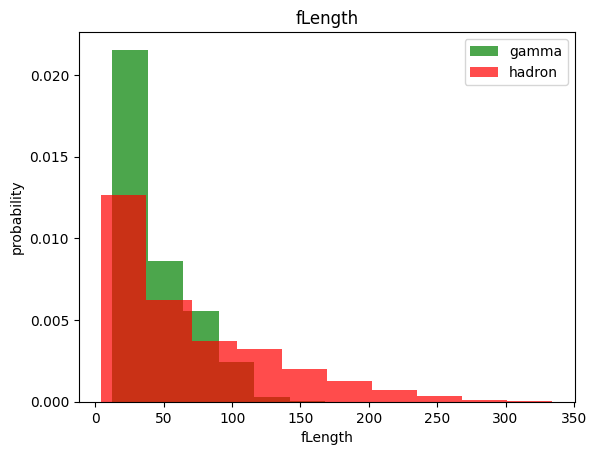

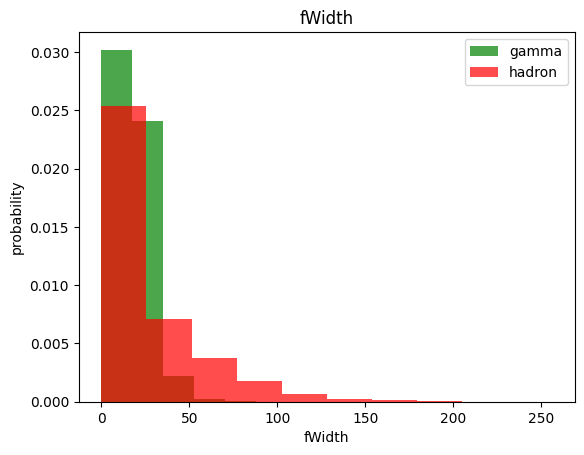

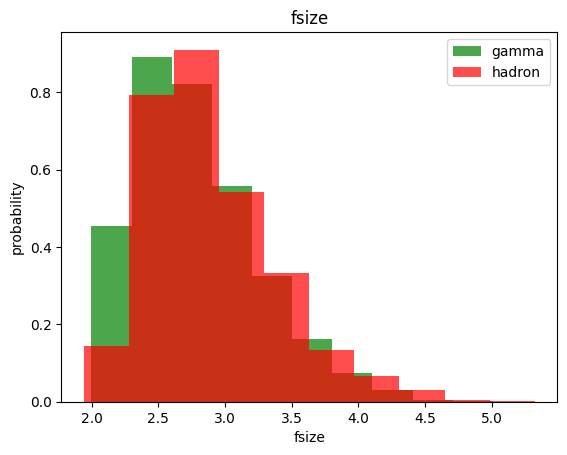

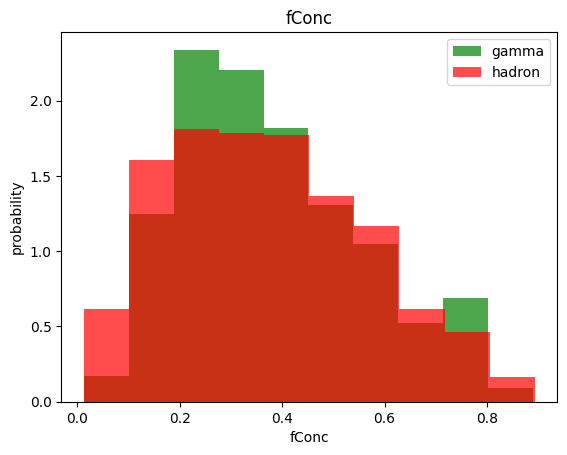

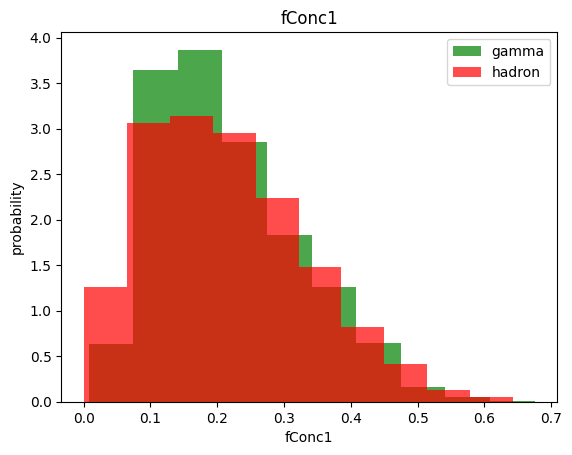

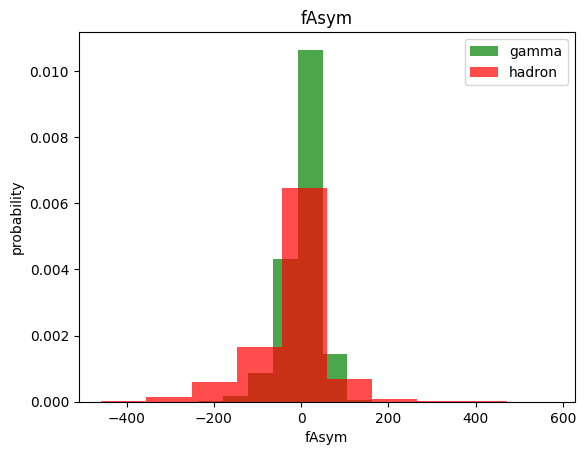

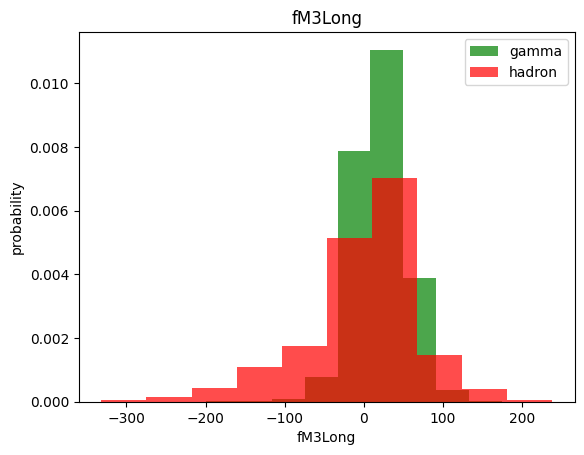

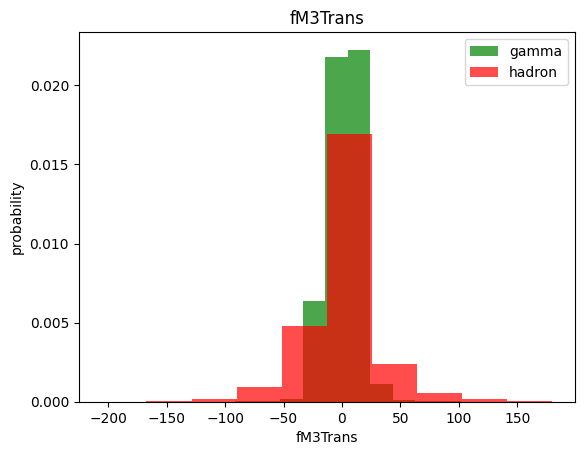

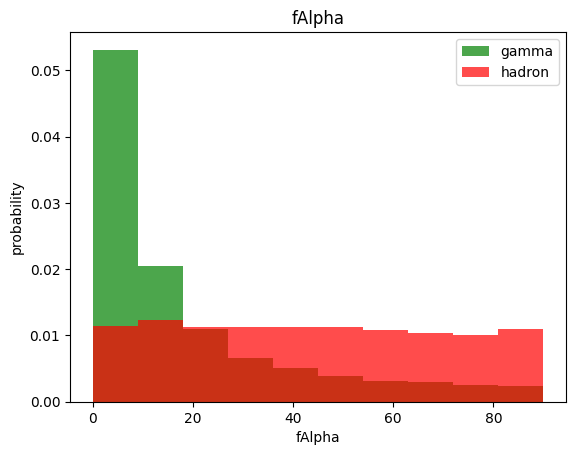

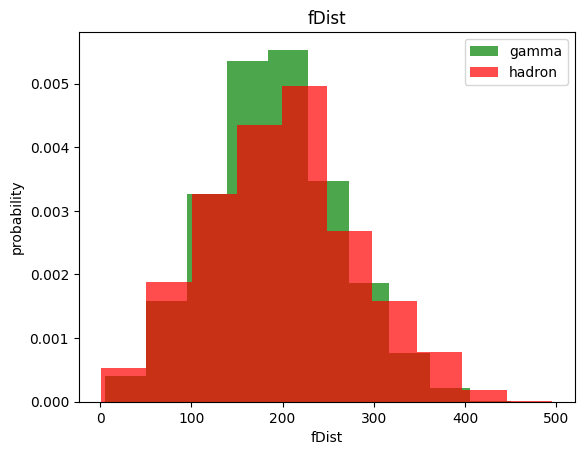

In [6]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label],color='green',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df["class"]==0][label],color='red',alpha=0.7,label='hadron',density=True)
    plt.title(label)
    plt.ylabel('probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [7]:
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [8]:
train.head(5)

,fLength,fWidth,fsize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
4215,38.3764,13.4924,2.4609,0.4533,0.2439,-38.1513,30.7856,-8.3981,9.2010,237.578,1
2358,31.9317,19.2540,2.7882,0.3518,0.2011,6.4928,27.0813,-14.7291,3.7064,110.549,1
4482,59.8073,19.6358,3.2693,0.1974,0.1041,20.7142,35.1619,10.5507,0.4660,230.680,1
1563,21.5656,10.3079,2.2201,0.5723,0.3102,3.4724,-16.0468,7.0316,63.7350,86.392,1
11201,100.5340,42.8958,2.8710,0.2194,0.1178,19.4933,50.5432,-39.0338,1.9948,286.301,1


In [9]:
def scale_dataset(dataframe,oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)

    data = np.hstack((X,np.reshape(y,(-1,1))))

    return data , X,y

    

In [10]:
train , X_train , y_train = scale_dataset(train,oversample=True)

In [11]:
len(train)

14786

In [12]:
len(X_train)

14786

In [13]:
len(y_train)

14786

In [14]:
type(train)

numpy.ndarray

In [4]:
def all_aboard(a, *args, **kw): 
    print(a, args, kw)
 
all_aboard(4, 7, 3, 0, x=10, y=64)

4 (7, 3, 0) {'x': 10, 'y': 64}


In [5]:
numbers = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]
result = [num + 3 for num in numbers if num % 2 == 0]
print(result)

[5, 11, 37]


5
11
37
